Bài tập 
### Cho dữ liệu KDDCup99 (xem thông tin chi tiết ở link trên và tải dữ 
liệu kddcup.data_10_percent.gz về để làm bài)
### Yêu cầu:
1. Đọc dữ liệu từ file "kddcup.data_10_percent.gz". Tạo RDD từ dữ liệu này 
2. Cho biết dữ liệu có bao element. 
3. In thông tin 3 element đầu tiên của RDD. 
4. Tạo một RDD mới từ RDD trên, với điều kiện các element trong RDD mới đề
u có chuỗi "normal." 
5. Cho biết RDD mới có bao nhiêu element, mất bao nhiêu thời gian để đếm 
số element này 
6. Tạo array chứa tất cả các element của RDD ban đầu, mất bao nhiêu thời 
gian để thực hiện việc này? 
7. Tạo một RDD sample bằng 1/10 RDD ban đầu, các element lấy ngẫu nhiên. 
8. Cho biết tỉ lệ các element chứa chuỗi "normal." so với tổng số element 
trong RDD sample, mất bao nhiêu thời gian để thực hiện công việc này? 
9. Tạo RDD sample với các element không chứa từ "normal." từ RDD sample 
trên. Số element của RDD này là bao nhiêu? In thông tin element đầu ti
ên của RDD này. 
10. Với RDD ban đầu, mỗi element là một chuỗi. Hãy tạo ra một RDD mới (arr
ay_RDD) với mỗi element là một danh sách các phần tử được tách ra từ chuỗi
 với dấu phân cách là ",". In thông tin element đầu tiên của RDD này. 
11. Với array_RDD trên, hãy cho biết có những protocol nào được sử dụng? 
Có bao nhiêu protocol? (biết protocol là phần tử thứ 2 trong từng element) 
12. Với array_RDD trên, hãy cho biết có những service nào được sử dụng? Có
 bao nhiêu service? (biết service là phần tử thứ 3 trong từng element) 
13. Một sản phẩm được tạo ra sẽ có một protocol và một service, tạo một 
bảng danh sách các sản phẩm bằng cách phối hợp từng protocol và service 
của 2 câu trên (gợi ý: dùng RDD1.cartesian(RDD2).collect(). In kết quả.
 Có bao nhiêu sản phẩm được tạo ra? 
14. Cho biết số lượng partition của array_RDD. 
15. Lưu array_RDD vào thư mục "kdd_cup" với mỗi partition là 1 file riêng 
lẻ.

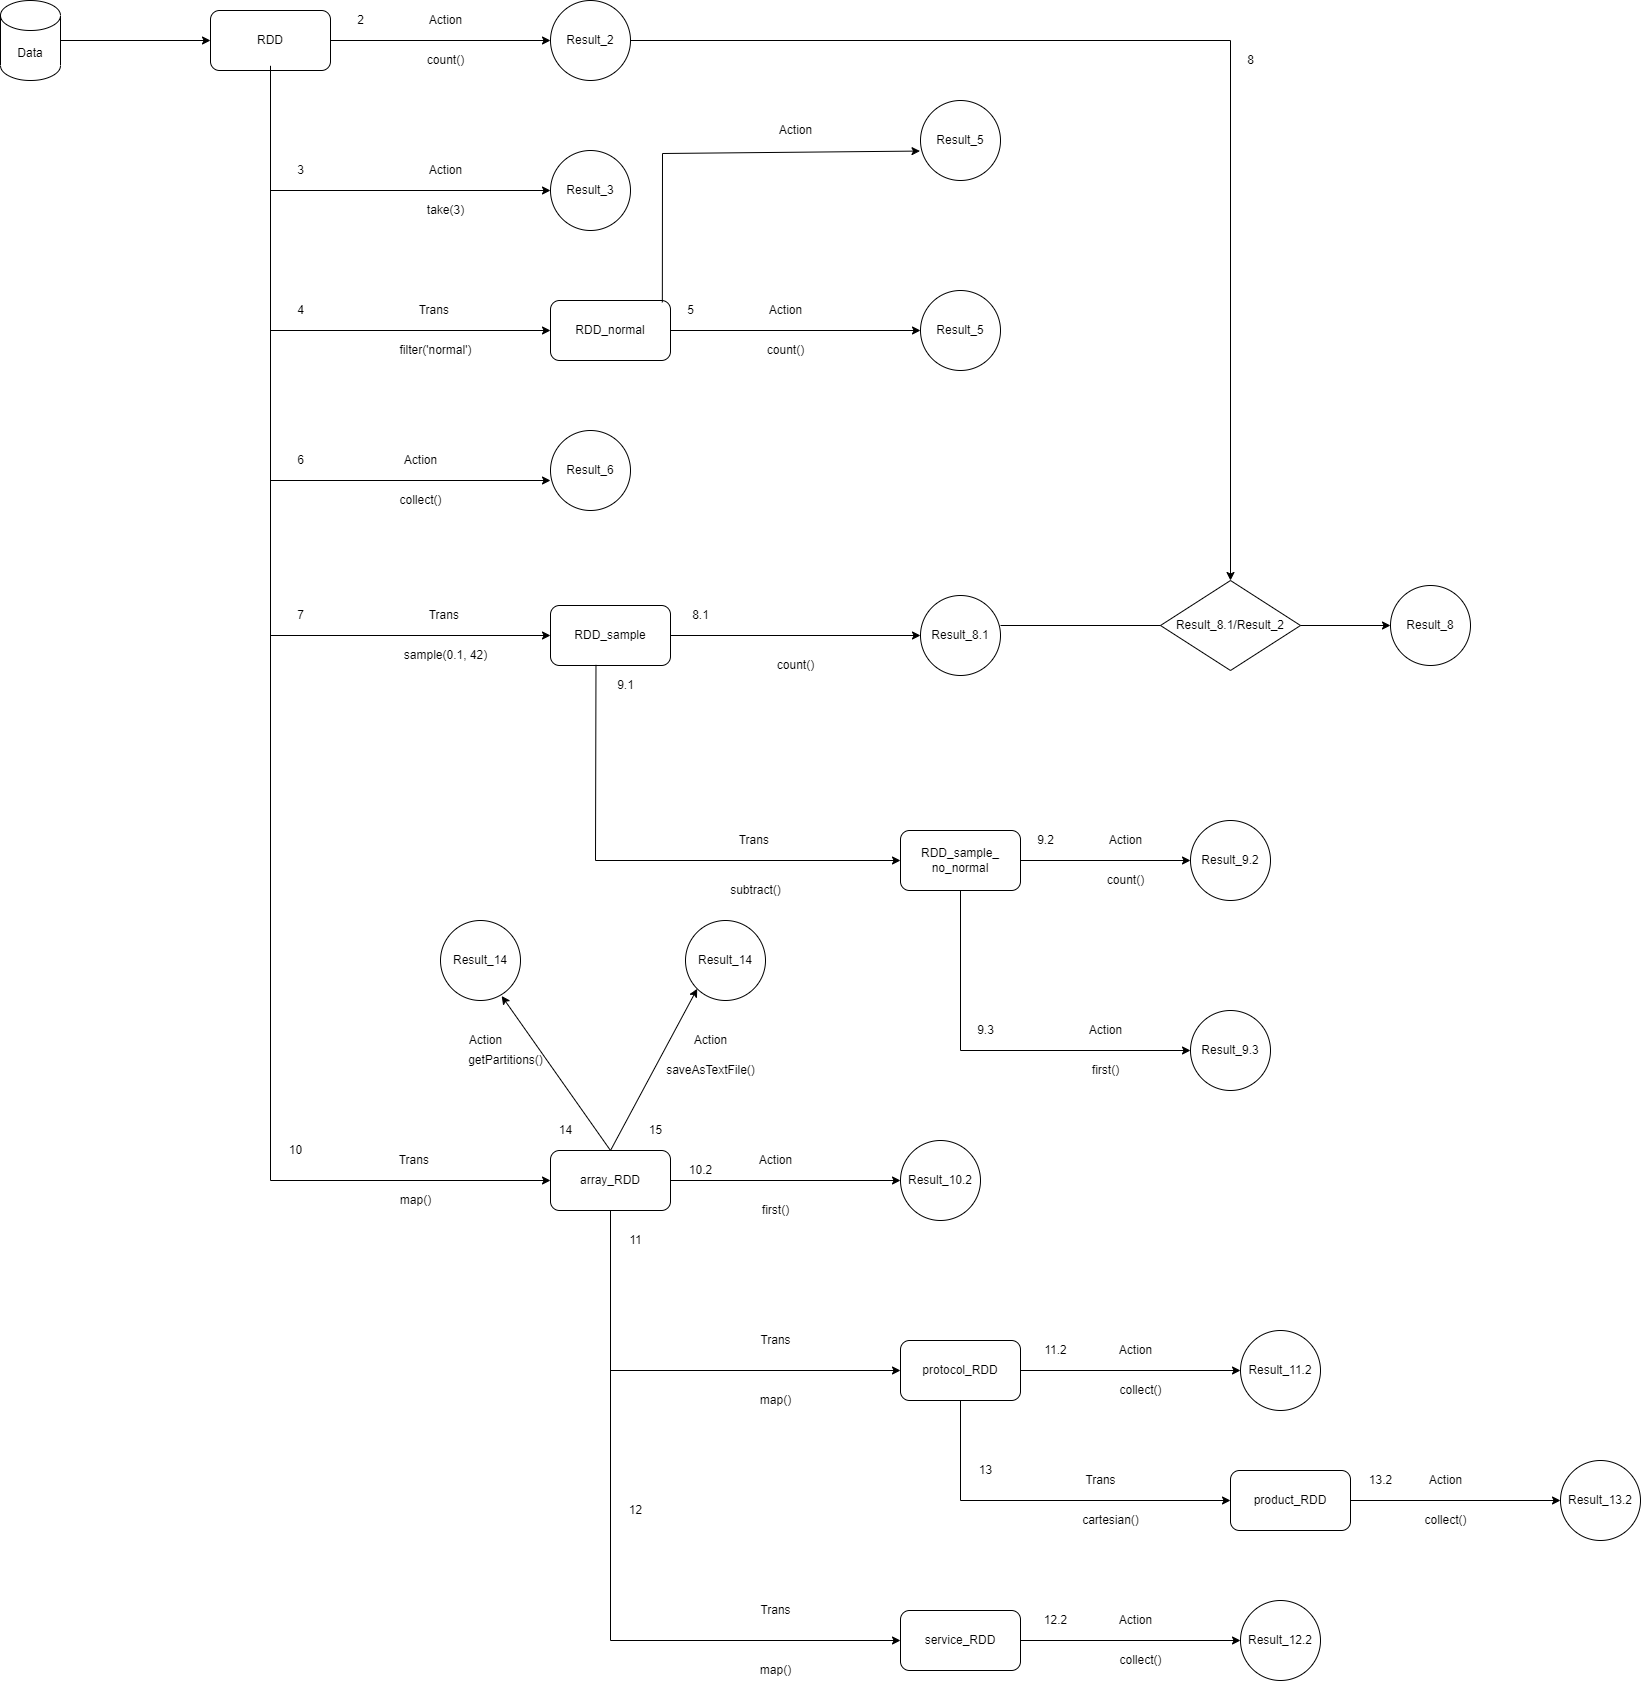

In [1]:
!apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar -xvf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"
import findspark
findspark.init()

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backpor

In [2]:
from pyspark.sql import SparkSession
from pyspark import SparkContext



In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/My Drive/LDS9/Chapter_3'

Mounted at /content/gdrive
/content/gdrive/My Drive/LDS9/Chapter_3


In [4]:
from pyspark import SparkContext
sc =SparkContext()


1. Đọc dữ liệu từ file "kddcup.data_10_percent.gz". Tạo RDD từ dữ liệu này


In [5]:
data = sc.textFile("kddcup.data_10_percent.gz")

2. Cho biết dữ liệu có bao element.

In [6]:
print("Lines:", data.count())

Lines: 494021


3. In thông tin 3 element đầu tiên của RDD

In [9]:
data.take(3)

['0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.']

4. Tạo một RDD mới từ RDD trên, với điều kiện các element trong RDD mới đều có chuỗi
"normal."

In [10]:
normal_data = data.filter(lambda x: 'normal.' in x)

In [12]:
normal_data.take(5)

['0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,39,39,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,49,49,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.']

5. Cho biết RDD mới có bao nhiêu element, mất bao nhiêu thời gian để đếm số element này?

In [13]:
from time import time
t0 = time()
normal_count = normal_data.count()
t1 = time() - t0
print("There are", normal_count, "'normal's")
print("Time to count:", format(round(t1,3)), "seconds")

There are 97278 'normal's
Time to count: 1.333 seconds


6. Tạo array chứa tất cả các element của RDD ban đầu, mất bao nhiêu thời gian để thực hiện
việc này?

In [14]:
t0 = time()
array_data = data.collect()
t1 = time() - t0
print("Data collected in", round(t1,3), "seconds")

Data collected in 4.205 seconds


7. Tạo một RDD sample bằng 1/10 RDD ban đầu, các element lấy ngẫu nhiên.

In [15]:
data_sample = data.sample(False, 0.1, 42)
sample_size = data_sample.count()
total_size = data.count()
print("Sample size is", sample_size, "of", total_size)


Sample size is 49387 of 494021


8. Cho biết tỉ lệ các element chứa chuỗi "normal." so với tổng số element trong RDD sample,
mất bao nhiêu thời gian để thực hiện công việc này?


In [16]:
sample_normal_tags = data_sample.filter(lambda x: "normal." in x)
t0 = time()
sample_normal_tags_count = sample_normal_tags.count()
tt = time() - t0
sample_normal_ratio = sample_normal_tags_count / float(sample_size)
print("Sample with normal size is", sample_normal_tags_count)
print("The ratio of 'normal' interactions is ", round(sample_normal_ratio,3))
print("Count done in", round(tt,3) ,"seconds")

Sample with normal size is 9733
The ratio of 'normal' interactions is  0.197
Count done in 1.197 seconds


9. Tạo RDD sample với các element không chứa từ "normal." từ RDD sample trên. Số element
của RDD này là bao nhiêu? In thông tin element đầu tiên của RDD này.


In [17]:
sample_without_normal = data_sample.subtract(sample_normal_tags)
print("size of sample without 'normal': ", sample_without_normal.count())


size of sample without 'normal':  39654


In [18]:
sample_without_normal.first()

'0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,509,509,0.00,0.00,0.00,0.00,1.00,0.00,0.00,255,255,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,smurf.'

10. Với RDD ban đầu, mỗi element là một chuỗi. Hãy tạo ra một RDD mới (array_RDD) với mỗi
element là một danh sách các phần tử được tách ra từ chuỗi với dấu phân cách là ",". In
thông tin element đầu tiên của RDD này.


In [19]:
array_RDD = data.map(lambda x: x.split(","))

In [20]:
array_RDD.first()

['0',
 'tcp',
 'http',
 'SF',
 '181',
 '5450',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '8',
 '8',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '1.00',
 '0.00',
 '0.00',
 '9',
 '9',
 '1.00',
 '0.00',
 '0.11',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 'normal.']

11. Với array_RDD trên, hãy cho biết có những protocol nào được sử dụng? Có bao nhiêu
protocol? (biết protocol là phần tử thứ 2 trong từng element)


In [21]:
protocols = array_RDD.map(lambda x: x[1]).distinct()
protocols.collect()

['tcp', 'udp', 'icmp']

In [23]:
print("Num of Protocols:", protocols.count())

Num of Protocols: 3


12. Với array_RDD trên, hãy cho biết có những service nào được sử dụng? Có bao nhiêu
service? (biết service là phần tử thứ 3 trong từng element)


In [24]:
services = array_RDD.map(lambda x: x[2]).distinct()
services.collect()

['http',
 'smtp',
 'finger',
 'domain_u',
 'auth',
 'telnet',
 'ftp',
 'eco_i',
 'ntp_u',
 'ecr_i',
 'other',
 'private',
 'pop_3',
 'ftp_data',
 'rje',
 'time',
 'mtp',
 'link',
 'remote_job',
 'gopher',
 'ssh',
 'name',
 'whois',
 'domain',
 'login',
 'imap4',
 'daytime',
 'ctf',
 'nntp',
 'shell',
 'IRC',
 'nnsp',
 'http_443',
 'exec',
 'printer',
 'efs',
 'courier',
 'uucp',
 'klogin',
 'kshell',
 'echo',
 'discard',
 'systat',
 'supdup',
 'iso_tsap',
 'hostnames',
 'csnet_ns',
 'pop_2',
 'sunrpc',
 'uucp_path',
 'netbios_ns',
 'netbios_ssn',
 'netbios_dgm',
 'sql_net',
 'vmnet',
 'bgp',
 'Z39_50',
 'ldap',
 'netstat',
 'urh_i',
 'X11',
 'urp_i',
 'pm_dump',
 'tftp_u',
 'tim_i',
 'red_i']

In [25]:
print("Service:", services.count())

Service: 66


13. Một sản phẩm được tạo ra sẽ có một protocol và một service, tạo một bảng danh sách các
sản phẩm bằng cách phối hợp từng protocol và service của 2 câu trên (gợi ý: dùng
RDD1.cartesian(RDD2).collect(). In kết quả. Có bao nhiêu sản phẩm được tạo ra?


In [27]:
product = protocols.cartesian(services).collect()
product

[('tcp', 'http'),
 ('tcp', 'smtp'),
 ('tcp', 'finger'),
 ('tcp', 'domain_u'),
 ('tcp', 'auth'),
 ('tcp', 'telnet'),
 ('tcp', 'ftp'),
 ('tcp', 'eco_i'),
 ('tcp', 'ntp_u'),
 ('tcp', 'ecr_i'),
 ('tcp', 'other'),
 ('tcp', 'private'),
 ('tcp', 'pop_3'),
 ('tcp', 'ftp_data'),
 ('tcp', 'rje'),
 ('tcp', 'time'),
 ('tcp', 'mtp'),
 ('tcp', 'link'),
 ('tcp', 'remote_job'),
 ('tcp', 'gopher'),
 ('tcp', 'ssh'),
 ('tcp', 'name'),
 ('tcp', 'whois'),
 ('tcp', 'domain'),
 ('tcp', 'login'),
 ('tcp', 'imap4'),
 ('tcp', 'daytime'),
 ('tcp', 'ctf'),
 ('tcp', 'nntp'),
 ('tcp', 'shell'),
 ('tcp', 'IRC'),
 ('tcp', 'nnsp'),
 ('tcp', 'http_443'),
 ('tcp', 'exec'),
 ('tcp', 'printer'),
 ('tcp', 'efs'),
 ('tcp', 'courier'),
 ('tcp', 'uucp'),
 ('tcp', 'klogin'),
 ('tcp', 'kshell'),
 ('tcp', 'echo'),
 ('tcp', 'discard'),
 ('tcp', 'systat'),
 ('tcp', 'supdup'),
 ('tcp', 'iso_tsap'),
 ('tcp', 'hostnames'),
 ('tcp', 'csnet_ns'),
 ('tcp', 'pop_2'),
 ('tcp', 'sunrpc'),
 ('tcp', 'uucp_path'),
 ('tcp', 'netbios_ns'),
 ('t

In [29]:
print("Có", len(product), "sản phẩm dc tạo ra")

Có 198 sản phẩm dc tạo ra


14. Cho biết số lượng partition của array_RDD.


In [30]:
array_RDD.getNumPartitions()

1

15. Lưu array_RDD vào thư mục "kdd_cup" với mỗi partition là 1 file riêng lẻ.

In [31]:
array_RDD.saveAsTextFile("kdd_cup")